#El conjunto de datos contiene información sobre los datos de vigilancia de la calidad del aire de la ciudad de Nueva York.##

Los datos sobre el medio ambiente y la salud de la ciudad de Nueva York muestra cómo el medio ambiente afecta la salud, mediante la publicación de datos e información que explican la relación. Los profesionales de la salud pública, las organizaciones comunitarias, las juntas comunitarias, las agencias municipales, los funcionarios electos, los trabajadores de la salud, los defensores y los neoyorquinos comunes utilizan este sitio web para obtener información importante que necesitan para hacer su trabajo y tomar decisiones importantes e informadas sobre la salud.

El Portal de Datos de Salud y Medio Ambiente es un proyecto de la Oficina de Vigilancia y Política Ambiental del Departamento de Salud e Higiene Mental de la Ciudad de Nueva York. Nuestra oficina trabaja para analizar datos sobre salud ambiental y traducirlos en políticas del Departamento de Salud y de toda la ciudad que protejan a los neoyorquinos, mejoren nuestro medio ambiente y mantengan nuestra salud. Agradecemos el apoyo y la colaboración de nuestros principales socios de diseño, Minds On Design Lab , para desarrollar y mejorar el Portal de Datos de Salud y Medio Ambiente.

La contaminación del aire es una de las amenazas ambientales más importantes para las poblaciones urbanas y si bien todas las personas están expuestas a ella, las emisiones de contaminantes, los niveles de exposición y la vulnerabilidad de la población varían según los barrios. La exposición a contaminantes del aire comunes se ha relacionado con enfermedades respiratorias y cardiovasculares, cánceres y muertes prematuras. Estos indicadores brindan una perspectiva a lo largo del tiempo y de las geografías de la ciudad de Nueva York para caracterizar mejor la calidad del aire y la salud en la ciudad. Los datos también se pueden explorar en línea en el Portal de datos sobre salud y medio ambiente:

**Contexto analítico**

Se proporciona un archivo CSV (calida de aire) que contiene detalles a contaminación del aire que es una de las amenazas ambientales más importantes para las poblaciones urbanas y si bien todas las personas están expuestas a ella, las emisiones de contaminantes, los niveles de exposición y la vulnerabilidad de la población varían según los barrios. La exposición a contaminantes del aire comunes se ha relacionado con enfermedades respiratorias y cardiovasculares, cánceres y muertes prematuras. Estos indicadores brindan una perspectiva a lo largo del tiempo y de las geografías de la ciudad de Nueva York para caracterizar mejor la calidad del aire y la salud en la ciudad. Los datos también se pueden explorar en línea en el Portal de datos sobre salud y medio ambienteetc. El delimitador en el archivo CSV dado es ; en un lugar del predeterminado ,.

**Tareas a realizar con los datos**

Leer, transformar y preparar datos para su visualización.

Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.


**Overview de la data**

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre la calidad del aire registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

**unique ID:** Un identificador único para cada medición de la calidad del aire en Nueva York.

**Indicator ID:** Un identificador para el tipo específico de contaminante que se está midiendo en Nueva York (por ejemplo, PM2.5, PM10, NO2, O3, etc.).

**Name:** El nombre del contaminante o el índice de calidad del aire que se está midiendo en Nueva York.

**Measure:** El nivel de concentración del contaminante en el aire de Nueva York.

**Measure Info:**Información adicional sobre la medida, como el método de medición, la unidad de medida (por ejemplo, microgramos por metro cúbico), etc.

**Geo Type Name:** El tipo de ubicación geográfica en Nueva York donde se realizó la medición (por ejemplo, distrito, barrio, etc.).

**Geo Join ID:** Un identificador que permite unir estos datos con otros conjuntos de datos geográficos de Nueva York.

**Geo Place Name:** El nombre del lugar en Nueva York donde se realizó la medición (por ejemplo, el nombre del distrito o barrio).

**Time Period:** El período de tiempo durante el cual se recogieron los datos de calidad del aire en Nueva York (por ejemplo, un año, un trimestre, un mes, etc.).

**Start Date:** La fecha de inicio del período de tiempo durante el cual se recogieron los datos de calidad del aire en Nueva York.

**Data Value:**El valor real de la concentración de contaminantes en el aire de Nueva York.

**Message:** Cualquier mensaje adicional o nota relacionada con el dato específico, como alertas de calidad del aire, recomendaciones para la salud, etc.



**LMPIEZA DE DATASET**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.

**Paso 1:** Identificar los valores faltantes

**Paso 2:** Decidir el método de imputación


   

   **PREGUNTAS**

1. ¿Cómo varía la calidad del aire según el tipo de área?      

2. ¿Cuáles son los vecindarios con la mejor calidad de aire?

3. ¿Qué vecindarios tienen la peor calidad del aire?

4. ¿Qué tipo de contaminante es más común en ciertas áreas?

5. ¿Cuál es la distribución de mediciones realizadas para cada tipo de contaminante?

6. ¿Cómo han cambiado los niveles de contaminación con el tiempo?

7. ¿Cómo han variado los niveles de contaminación por PM2.5 a lo largo de los años?

# Limpieza de datos



In [17]:
import pandas as pd
from google.colab import files

# Cargar el archivo desde Google Colab
uploaded = files.upload()

# Leer el archivo CSV
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
df = pd.read_csv(file_name)

# Mostrar la descripción de las columnas
print("Descripción de las columnas:")
print(df.info())

# Identificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values)

# Imputar valores faltantes en columnas numéricas con la mediana
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Imputar valores faltantes en columnas categóricas con la moda
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verificar que no queden valores nulos
print("\nVerificación de valores nulos después de la imputación:")
print(df.isnull().sum())

# Guardar el DataFrame limpio para su uso posterior
df_cleaned = df.copy()
print("\nLimpieza de datos completada. DataFrame limpio guardado en 'df_cleaned'.")


Saving Air_Quality.csv to Air_Quality (1).csv
Descripción de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB
None

Valores faltantes por columna:
Unique ID             0
Indicator ID          0
Name                  0
Measure        

<ipython-input-38-a2bc81d33ab6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_type_air_quality.index, y=area_type_air_quality.values, palette='magma')


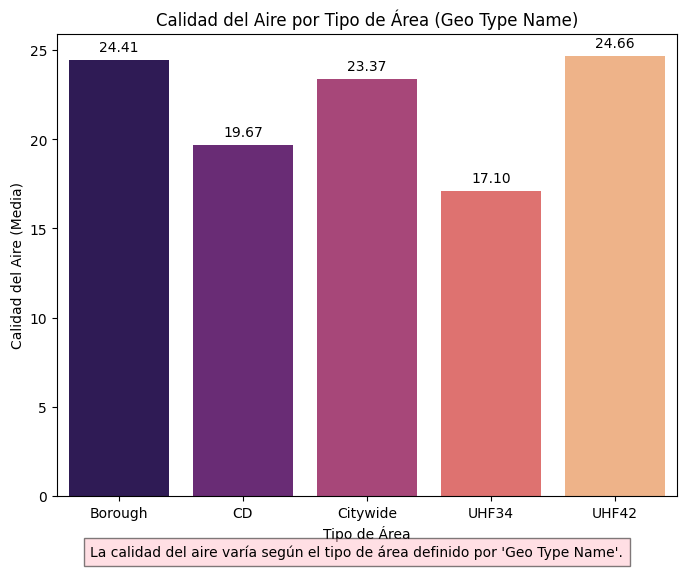

In [38]:
# Pregunta 1 ¿Cómo varía la calidad del aire según el tipo de área?


# Agrupar por tipo de área (Geo Type Name) y calcular la media de la calidad del aire
area_type_air_quality = df.groupby('Geo Type Name')['Data Value'].mean()

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=area_type_air_quality.index, y=area_type_air_quality.values, palette='magma')
plt.title('Calidad del Aire por Tipo de Área (Geo Type Name)')
plt.xlabel('Tipo de Área')
plt.ylabel('Calidad del Aire (Media)')

# Agregar etiquetas de datos
for index, value in enumerate(area_type_air_quality.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Añadir un cuadro de texto en la parte inferior
plt.figtext(0.5, 0.01, "La calidad del aire varía según el tipo de área definido por 'Geo Type Name'.",
            ha="center", fontsize=10, bbox={"facecolor":"pink", "alpha":0.5, "pad":5})

plt.show()

<ipython-input-39-410e122dec2f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Data Value', y='Geo Place Name', data=top_10_best_air_quality, palette='viridis')


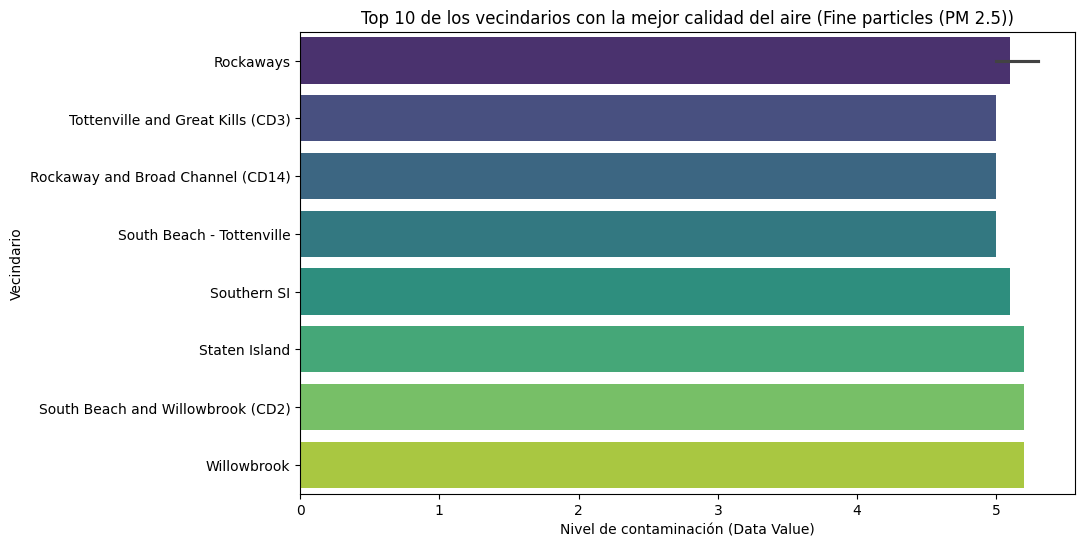

In [39]:
# Pregunta 2: ¿Cuáles son los vecindarios con la mejor calidad de aire?

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el DataFrame limpio (df_cleaned) de la parte anterior
if 'df_cleaned' in globals():
    # Filtrar datos para un contaminante específico (PM2.5)
    contaminante = 'Fine particles (PM 2.5)'
    df_filtered = df_cleaned[df_cleaned['Name'] == contaminante]

    # Mostrar el top 10 de los vecindarios con la mejor calidad del aire (menor Data Value)
    top_10_best_air_quality = df_filtered.sort_values(by='Data Value').head(10)

    # Verificar si hay datos para graficar
    if not top_10_best_air_quality.empty:
        # Visualización del top 10 de los vecindarios con la mejor calidad del aire
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Data Value', y='Geo Place Name', data=top_10_best_air_quality, palette='viridis')
        plt.title(f'Top 10 de los vecindarios con la mejor calidad del aire ({contaminante})')
        plt.xlabel('Nivel de contaminación (Data Value)')
        plt.ylabel('Vecindario')
        plt.show()
    else:
        print(f"No hay datos disponibles para el contaminante: {contaminante}")
else:
    print("Primero ejecuta la limpieza de datos para obtener el DataFrame limpio.")

<ipython-input-40-40a320cb4008>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')


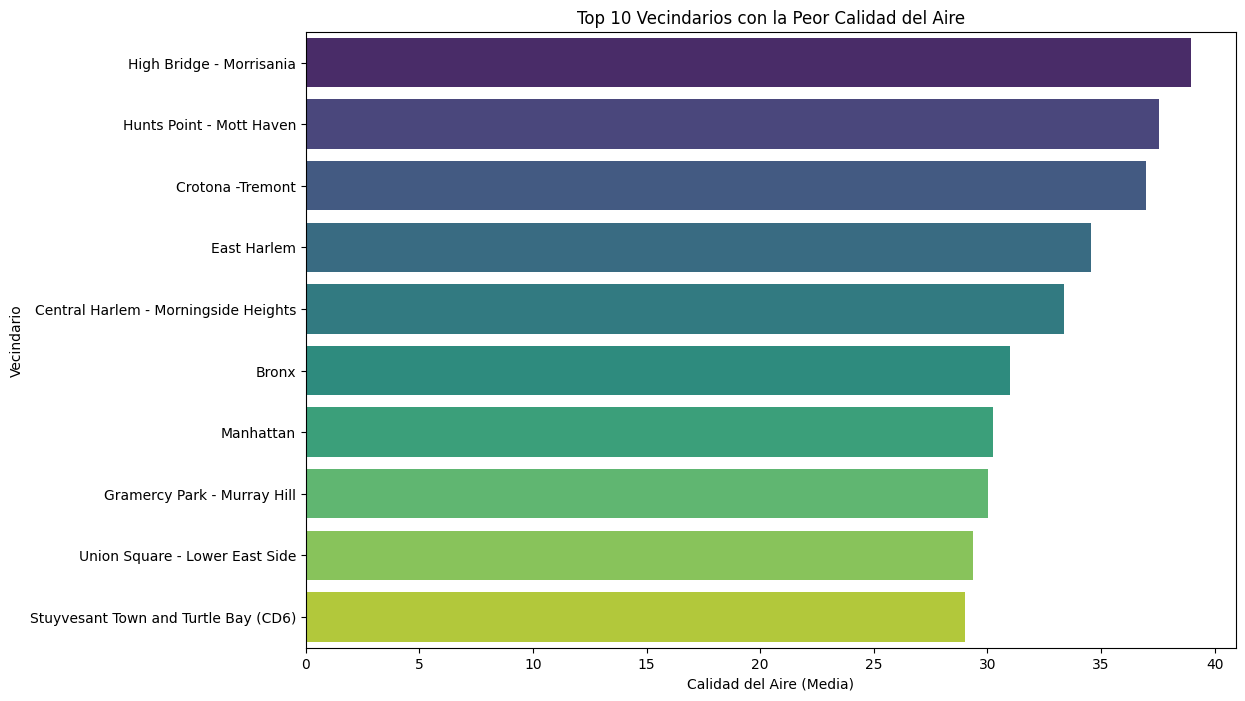

In [40]:
#Pregunta 3: ¿Qué vecindarios tienen la peor calidad del aire?

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por vecindario y calcular la media de la calidad del aire
neighborhood_air_quality = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False)

# Seleccionar los 10 primeros vecindarios con la peor calidad del aire
top_10_neighborhoods = neighborhood_air_quality.head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')
plt.title('Top 10 Vecindarios con la Peor Calidad del Aire')
plt.xlabel('Calidad del Aire (Media)')
plt.ylabel('Vecindario')

plt.show()



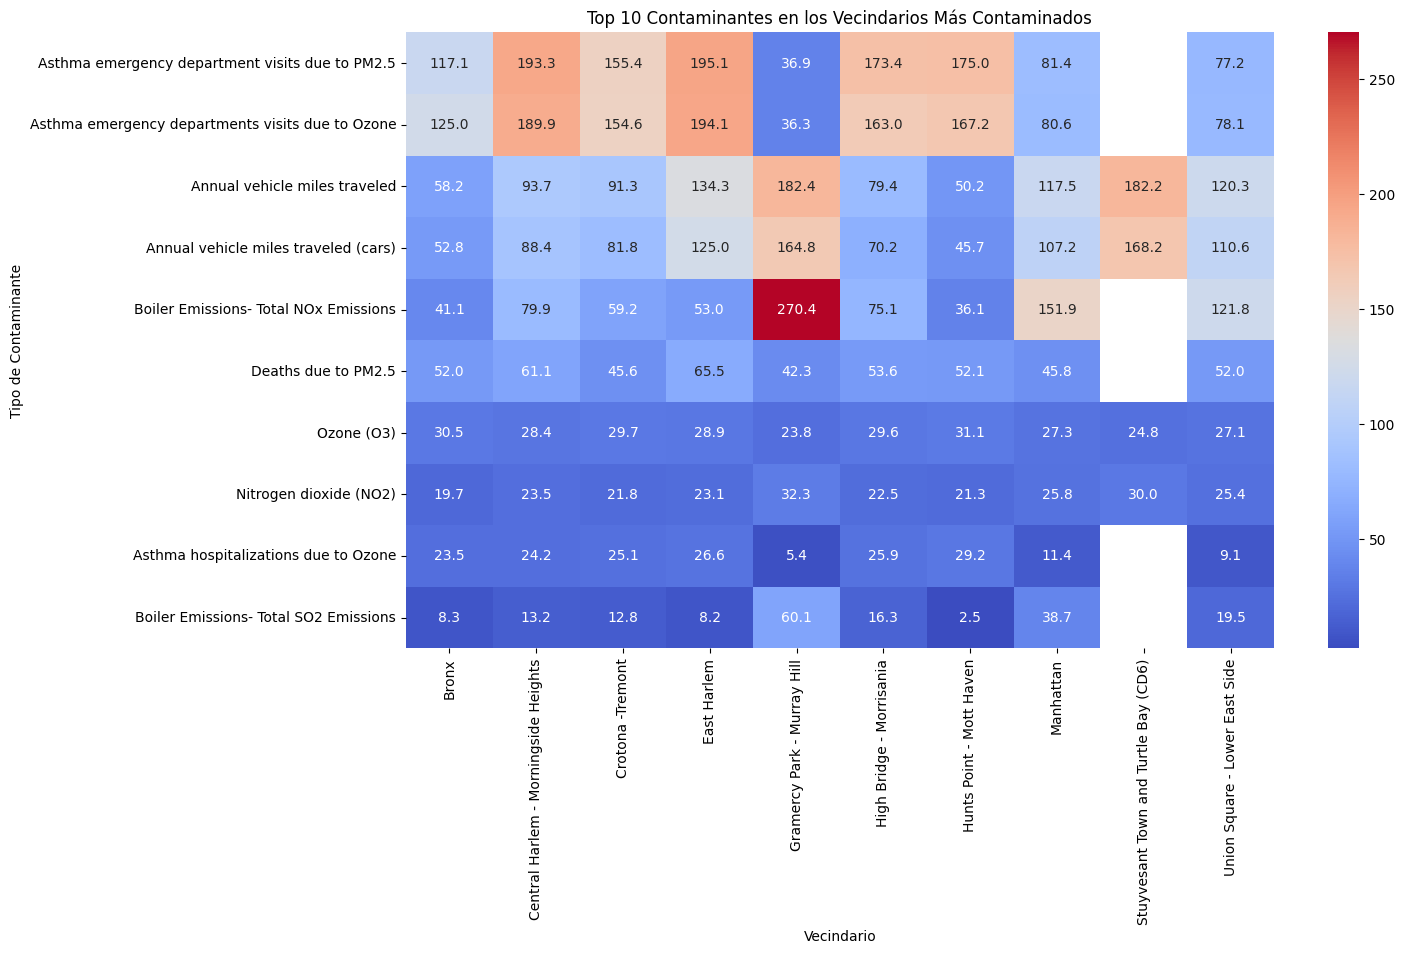

In [41]:
# Pregunta 4: ¿Qué tipo de contaminante es más común en ciertas áreas?

import matplotlib.pyplot as plt
import seaborn as sns

# Identificar los 10 vecindarios más contaminados
neighborhood_air_quality = df.groupby('Geo Place Name')['Data Value'].mean().sort_values(ascending=False)
top_10_neighborhoods = neighborhood_air_quality.head(10).index

# Filtrar el dataset para incluir solo los 10 vecindarios más contaminados
df_top_10_neighborhoods = df[df['Geo Place Name'].isin(top_10_neighborhoods)]

# Agrupar por tipo de contaminante y vecindario, y calcular la media
pollutant_by_area = df_top_10_neighborhoods.groupby(['Name', 'Geo Place Name'])['Data Value'].mean().unstack()

# Seleccionar los 10 contaminantes más comunes en estos vecindarios
top_10_pollutants = pollutant_by_area.mean(axis=1).sort_values(ascending=False).head(10).index
pollutant_by_area_top_10 = pollutant_by_area.loc[top_10_pollutants]

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.heatmap(pollutant_by_area_top_10, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Top 10 Contaminantes en los Vecindarios Más Contaminados')
plt.xlabel('Vecindario')
plt.ylabel('Tipo de Contaminante')

plt.show()

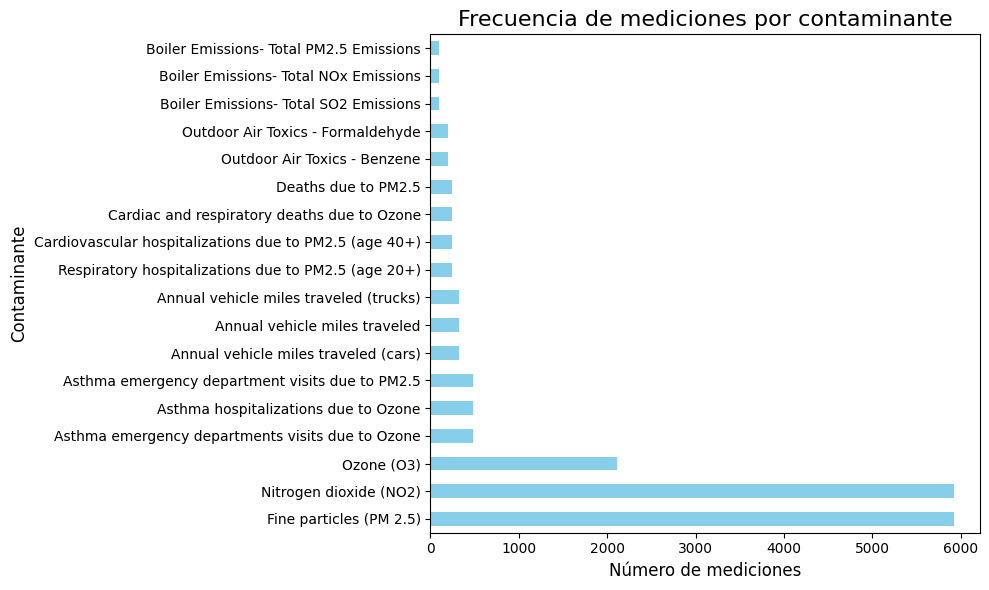

In [42]:
# Pregunta 5: ¿Cuál es la distribución de mediciones realizadas para cada tipo de contaminante?

import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de mediciones por contaminante
measurements_per_contaminant = df_cleaned['Name'].value_counts()

# Graficar la frecuencia de mediciones
plt.figure(figsize=(10, 6))
measurements_per_contaminant.plot(kind='barh', color='skyblue')  # Barras horizontales
plt.title('Frecuencia de mediciones por contaminante', fontsize=16)
plt.xlabel('Número de mediciones', fontsize=12)
plt.ylabel('Contaminante', fontsize=12)
plt.tight_layout()
plt.show()

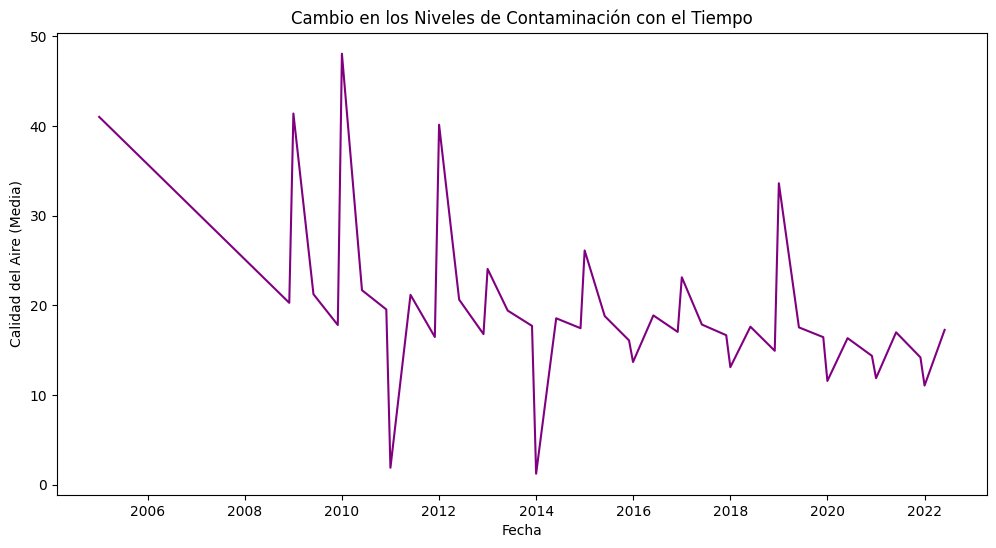

In [43]:
# Pregunta 6: ¿Cómo han cambiado los niveles de contaminación con el tiempo?

# Convertir la columna de fecha a datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Agrupar por fecha y calcular la media de la calidad del aire
time_series_air_quality = df.groupby('Start_Date')['Data Value'].mean()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series_air_quality.index, y=time_series_air_quality.values, color='purple')
plt.title('Cambio en los Niveles de Contaminación con el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Calidad del Aire (Media)')

plt.show()

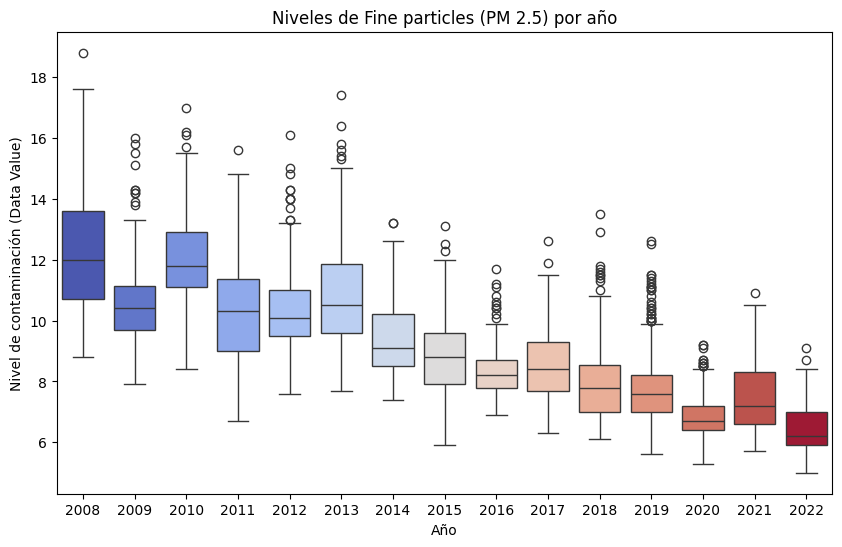

In [44]:
# Pregunta 7: ¿Cómo han variado los niveles de contaminación por PM2.5 a lo largo de los años?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos para un contaminante específico
contaminante = 'Fine particles (PM 2.5)'
df_filtered = df_cleaned[df_cleaned['Name'] == contaminante].copy()

# Extraer el año de la columna 'Start_Date' (si no está en formato datetime, conviértela)
df_filtered['Start_Date'] = pd.to_datetime(df_filtered['Start_Date'])
df_filtered['Year'] = df_filtered['Start_Date'].dt.year  # Extraer el año

# Graficar niveles de contaminación por año
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Data Value', data=df_filtered, hue='Year', palette='coolwarm', legend=False)
plt.title(f'Niveles de {contaminante} por año')
plt.xlabel('Año')
plt.ylabel('Nivel de contaminación (Data Value)')
plt.show()